# PART - ONE

## Face detection from training images

### Importing the necessary libraries

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

data = np.load('images.npy')

### Checking out a couple of samples from the loaded data

In [4]:
data[13][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.24268689057421453, 'y': 0.14420803782505912},
   {'x': 0.3531960996749729, 'y': 0.3640661938534279}],
  'imageWidth': 1400,
  'imageHeight': 642},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.3531960996749729, 'y': 0.34988179669030733},
   {'x': 0.4626218851570964, 'y': 0.6430260047281324}],
  'imageWidth': 1400,
  'imageHeight': 642},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.49945828819068255, 'y': 0.41371158392434987},
   {'x': 0.628385698808234, 'y': 0.6832151300236406}],
  'imageWidth': 1400,
  'imageHeight': 642},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.6392199349945829, 'y': 0.10638297872340426},
   {'x': 0.7356446370530878, 'y': 0.3664302600472813}],
  'imageWidth': 1400,
  'imageHeight': 642}]

### The sample with index 13 has got 4 faces.

In [8]:
data[13][0]

array([[[251, 255, 254],
        [251, 255, 254],
        [251, 255, 254],
        ...,
        [159, 174, 179],
        [158, 173, 178],
        [158, 173, 178]],

       [[251, 255, 254],
        [251, 255, 254],
        [251, 255, 254],
        ...,
        [159, 174, 179],
        [158, 173, 178],
        [158, 173, 178]],

       [[251, 255, 254],
        [251, 255, 254],
        [251, 255, 254],
        ...,
        [159, 174, 179],
        [158, 173, 178],
        [158, 173, 178]],

       ...,

       [[ 72,  73,  75],
        [102, 103, 107],
        [113, 114, 118],
        ...,
        [ 50,  54,  53],
        [ 60,  65,  61],
        [ 62,  67,  63]],

       [[ 70,  72,  84],
        [ 90,  93, 102],
        [122, 122, 130],
        ...,
        [ 61,  62,  66],
        [ 78,  82,  85],
        [ 83,  87,  90]],

       [[ 85,  87,  99],
        [101, 104, 113],
        [128, 128, 136],
        ...,
        [ 72,  73,  77],
        [ 80,  84,  87],
        [ 79,  83,  86]]

In [6]:
data[3][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.495, 'y': 0.27147766323024053},
   {'x': 0.595, 'y': 0.46048109965635736}],
  'imageWidth': 600,
  'imageHeight': 291}]

### The sample with index 3 has got 1 face.

In [7]:
data[3][0]

array([[[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       ...,

       [[ 80,  31,  18, 255],
        [ 82,  36,  23, 255],
        [ 79,  31,  21, 255],
        ...,
        [121, 114, 104, 255],
        [120, 112, 104, 255],
        [116, 109,  99, 255]],

       [[ 73,  38,  20, 255],
        [ 76,  40,  24, 255],
        [ 79,  45,  30, 255],
        ...,
        [121, 112, 104, 255],
        [117, 110, 102, 255],
        [113, 106,  97, 255]],

       [[ 79

### Setting the values of image width,height and alpha

In [10]:
height = 224
width = 224
alpha = 1

### Creating the features (images) and labels (masks) using the data

In [11]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), height, width))
X_train = np.zeros((int(data.shape[0]), height, width, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(height, width), interpolation=cv2.INTER_CUBIC)
    try:
          img = img[:, :, :3]
    except:
          continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * width)
        x2 = int(i["points"][1]['x'] * width)
        y1 = int(i["points"][0]['y'] * height)
        y2 = int(i["points"][1]['y'] * height)
        masks[index][y1:y2, x1:x2] = 1

In [12]:
# Printing out the shapes of X_train and mask
print('The shape of X_train is: ',X_train.shape)
print('The shape of mask is: ',masks.shape)

(409, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.96862745  1.          0.99215686]
  [ 0.96862745  1.          0.99215686]
  [ 0.96862745  1.          0.99215686]
  ...
  [ 0.58431375  0.7019608   0.74117649]
  [ 0.34901965  0.4666667   0.50588238]
  [ 0.25490201  0.37254906  0.41176474]]

 [[ 0.96862745  1.          0.99215686]
  [ 0.96862745  1.          0.99215686]
  [ 0.96862745  1.          0.99215686]
  ...
  [ 0.58431375  0.7019608   0.74117649]
  [ 0.34901965  0.4666667   0.50588238]
  [ 0.25490201  0.37254906  0.41176474]]

 [[ 0.96862745  1.          0.99215686]
  [ 0.96862745  1.          0.99215686]
  [ 0.96862745  1.          0.99215686]
  ...
  [ 0.59215689  0.70980394  0.74901962]
  [ 0.34901965  0.4666667   0.50588238]
  [ 0.25490201  0.37254906  0.41176474]]

 ...

 [[ 0.29411769  0.3176471   0.36470592]
  [ 0.26274514  0.28627455  0.35686278]
  [ 0.53725493  0.56078434  0.65490198]
  ...
  [-0.43529409 -0.40392154 -0.38039213]
  [-0.45098037 -0.41960782 -0.39607841]
  [-0.47450978 -0.44313723 -0.41960782]]

 [

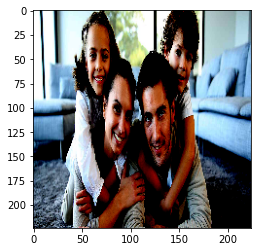

In [14]:
# Displaying the image with index 13
n = 13
print(X_train[n])
plt.imshow(X_train[n])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.83529413 -0.72549021 -0.65490198]
  [-0.82745099 -0.70980394 -0.63921571]
  [-0.81176472 -0.68627453 -0.62352943]
  ...
  [-0.87450981 -0.81960785 -0.77254903]
  [-0.87450981 -0.81960785 -0.75686276]
  [-0.86666667 -0.79607844 -0.73333335]]

 [[-0.8509804  -0.7019608  -0.65490198]
  [-0.8509804  -0.7019608  -0.65490198]
  [-0.83529413 -0.68627453 -0.63921571]
  ...
  [-0.86666667 -0.81176472 -0.7647059 ]
  [-0.84313726 -0.78823531 -0.72549021]
  [-0.83529413 -0.7647059  -0.70980394]]

 [[-0.84313726 -0.67843139 -0.63921571]
  [-0.83529413 -0.67058825 -0.63137257]
  [-0.84313726 -0.67843139 -0.63921571]
  ...
  [-0.85882354 -0.80392158 -0.75686276]
  [-0.81960785 -0.7647059  -0.70980394]
  [-0.81176472 -0.74117649 -0.68627453]]

 ...

 [[-0.71764708 -0.59215689 -0.52941179]
  [-0.7019608  -0.57647061 -0.51372552]
  [-0.69411767 -0.59215689 -0.52156866]
  ...
  [-0.90588236 -0.81960785 -0.77254903]
  [-0.9137255  -0.82745099 -0.78039217]
  [-0.90588236 -0.81960785 -0.77254903]]

 [

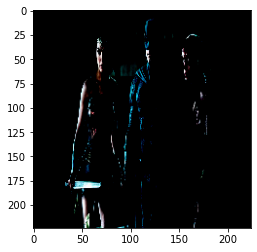

In [17]:
# Displaying the image with index 15
n = 15
print(X_train[n])
plt.imshow(X_train[n])

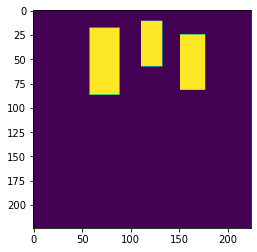

In [19]:
# Displaying the mask of the image with index 15. Clarly we can see that 3 masks are there for 3 faces
plt.imshow(masks[n])

In [51]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf

cell_height = 28
cell_width = 28

batch_size = 1
threads = 1

### Creating the model using MobileNet

In [52]:
model = MobileNet(input_shape=(height, width, 3), include_top=False, alpha=alpha, weights="imagenet")
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

### Adding the layers of U-NET architecture

In [61]:
def create_model(trainable=True):
    model = MobileNet(input_shape=(height, width, 3), include_top=False, alpha=aplha, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer("conv_pw_1_relu").output 
    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
 #   x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((height, height))(x)

    return Model(inputs=model.input, outputs=x)

In [62]:
model = create_model()

# Print summary
model.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_16[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________________________________________________________________________

### Designing the dice coefficient and the loss function

In [63]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compiling the model

In [65]:
model = create_model(False)
model.summary()

model.compile(loss=loss, optimizer='Adam', metrics=[dice_coefficient])

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_17[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________________________________________________________________________

### Making predictions

In [66]:
model.fit(X_train,masks,epochs = 10,verbose=1,batch_size=1)

Epoch 1/20
409/409 [==============================] - 481s 1s/step - loss: 1.1554 - dice_coefficient: 0.4909
Epoch 2/20
409/409 [==============================] - 476s 1s/step - loss: 0.8769 - dice_coefficient: 0.5809
Epoch 3/20
409/409 [==============================] - 474s 1s/step - loss: 0.8247 - dice_coefficient: 0.5998
Epoch 4/20
409/409 [==============================] - 474s 1s/step - loss: 0.7982 - dice_coefficient: 0.6105
Epoch 5/20
409/409 [==============================] - 474s 1s/step - loss: 0.7846 - dice_coefficient: 0.6164
Epoch 6/20
409/409 [==============================] - 499s 1s/step - loss: 0.7740 - dice_coefficient: 0.6204
Epoch 7/20
409/409 [==============================] - 488s 1s/step - loss: 0.7598 - dice_coefficient: 0.6257
Epoch 8/20
409/409 [==============================] - 477s 1s/step - loss: 0.7434 - dice_coefficient: 0.6328
Epoch 9/20
409/409 [==============================] - 335s 818ms/step - loss: 0.7363 - dice_coefficient: 0.6364
Epoch 10/20
409/

# ---------------------------------------------------------------------------------------------------------

# PART - TWO

 ## Curation of the bounding box co-ordinates for each image (automated)

In [32]:
import numpy as np
import cv2
import glob

# Using the Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [51]:
# Storing the paths of all images present in the directory, in a list
images_list = glob.glob('C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/training_images/*')

In [53]:
# Finding out the number of images present in the directory
print('The number of images found is: ',len('C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/training_images\\'))

79

In [54]:
# Storing only the image names in the images_list list
for i in range(len(images_list)):
    images_list[i] = images_list[i][79:]
#     print(i)
images_list

['real_00001.jpg',
 'real_00002.jpg',
 'real_00003.jpg',
 'real_00004.jpg',
 'real_00005.jpg',
 'real_00006.jpg',
 'real_00007.jpg',
 'real_00008.jpg',
 'real_00009.jpg',
 'real_00010.jpg',
 'real_00011.jpg',
 'real_00012.jpg',
 'real_00013.jpg',
 'real_00014.jpg',
 'real_00015.jpg',
 'real_00016.jpg',
 'real_00017.jpg',
 'real_00018.jpg',
 'real_00019.jpg',
 'real_00020.jpg',
 'real_00021.jpg',
 'real_00022.jpg',
 'real_00023.jpg',
 'real_00024.jpg',
 'real_00025.jpg',
 'real_00026.jpg',
 'real_00027.jpg',
 'real_00028.jpg',
 'real_00029.jpg',
 'real_00030.jpg',
 'real_00031.jpg',
 'real_00032.jpg',
 'real_00033.jpg',
 'real_00034.jpg',
 'real_00035.jpg',
 'real_00036.jpg',
 'real_00037.jpg',
 'real_00038.jpg',
 'real_00039.jpg',
 'real_00040.jpg',
 'real_00041.jpg',
 'real_00042.jpg',
 'real_00043.jpg',
 'real_00044.jpg',
 'real_00045.jpg',
 'real_00046.jpg',
 'real_00047.jpg',
 'real_00048.jpg',
 'real_00049.jpg',
 'real_00050.jpg',
 'real_00051.jpg',
 'real_00052.jpg',
 'real_00053

In [55]:
import pandas as pd
df = pd.DataFrame(data=[],columns=['x','y','w','h','Total_Faces','Image_Name'])
for image in images_list:
    name = image
    img = cv2.imread('C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/training_images/' + image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    # print('number of faces:')
    # print(len(faces))
    for (x,y,w,h) in faces:
        l = []
        l.append(x)
        l.append(y)
        l.append(w)
        l.append(h)
        l.append(len(faces))
        l.append(name)
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        df2 = pd.DataFrame(data=[l],columns=['x','y','w','h','Total_Faces','Image_Name'])
        df = df.append(df2)
#     cv2.imshow('img',img)
#     cv2.waitKey(0)

In [56]:
df.head()

x    y    w    h Total_Faces      Image_Name
0  146  140  428  428           1  real_00001.jpg
0   80  140  436  436           1  real_00002.jpg
0   33  121  362  362           1  real_00003.jpg
0  134  173  356  356           1  real_00004.jpg
0   61   62  472  472           1  real_00006.jpg

# ---------------------------------------------------------------------------------------------------------

# PART - THREE

## Using a pre-trained model trained on Face recognition to recognise similar faces

In [1]:
# Imports
import pandas as pd, numpy as np, matplotlib.pyplot as plt, sklearn, re, random
import matplotlib.gridspec as gridspec
from tqdm.notebook import tqdm
import tensorflow, cv2
%matplotlib inline

# Extract content from zipfile
from zipfile import ZipFile

# Model
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential, Model
from sklearn.svm import SVC

# Encode, standardize and PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [2]:
import glob
pins = glob.glob('C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS/*')
pins

['C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS\\pins_Aaron Paul',
 'C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS\\pins_alexandra daddario',
 'C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS\\pins_Alvaro Morte',
 'C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS\\pins_alycia debnam carey face',
 'C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS\\pins_Amanda Crew',
 'C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS\\pins_Amaury Nolasco',
 'C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS\\pins_amber heard face',
 'C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS\\pins_Anna Gunn',
 'C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS\\pins_anne hathaway',
 'C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS\\pins_barbara palvin face',
 'C:/Users/adm

In [3]:
for i in range(len(pins)):
    pins[i] = pins[i][73:]
pins

['pins_Aaron Paul',
 'pins_alexandra daddario',
 'pins_Alvaro Morte',
 'pins_alycia debnam carey face',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_amber heard face',
 'pins_Anna Gunn',
 'pins_anne hathaway',
 'pins_barbara palvin face',
 'pins_bellamy blake face',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_bill gates',
 'pins_Brenton Thwaites',
 'pins_brie larson',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_chadwick boseman face',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_david mazouz',
 'pins_Dominic Purcell',
 'pins_drake',
 'pins_dua lipa face',
 'pins_Dwayne Johnson',
 'pins_eliza taylor',
 'pins_elizabeth olsen face',
 'pins_elon musk',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_emma watson face',
 'pins_gal gadot face',
 'pins_grant gustin face',
 'pins_Gwyneth P

In [4]:
print('The number of celebrities present is: ',len(pins))

The number of celebrities present is:  100


In [5]:
# Selecting a random folder and then a random image from the lot
import random
path = 'C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS/'
selection1 = random.choice(pins)
img_path = path +'/'+ selection1 +'/'+ '*'
selection_list = glob.glob(img_path)
selection2 = random.choice(selection_list)
print(selection2)

C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/PINS/PINS//pins_dua lipa face\dua lipa face11.jpg


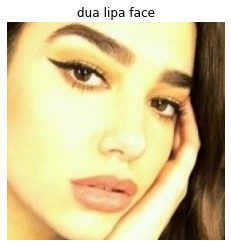

In [6]:
# Displaying the image
image = cv2.imread(selection2)
plt.axis("off")
plt.title(selection1[5:])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### Building the face model using VGG

In [7]:
def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape = (224, 224, 3)))
    model.add(Convolution2D(64, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))
    
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))
    
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides = (2, 2)))
    
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides =(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    model.add(Convolution2D(4096, (7, 7), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [8]:
# Model Summary
model = vgg_face()
model.load_weights('C:/Users/admin/Desktop/Great Learning/Advanced Computer Vision/Part 3 - vgg_face_weights.h5')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Functions have been defined for loading the meta data

In [10]:
import os
class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    exts = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
                exts.append(ext)
    return np.array(metadata), exts

metadata, exts = load_metadata(path)
labels = np.array([meta.name for meta in metadata])


### Defining the VGG Face Descriptor

In [11]:
vgg_face_descriptor = Model(inputs = model.layers[0].input, outputs = model.layers[-2].output)

### Embedding for the images

In [12]:
# Get embedding vector for first image in the metadata using the pre-trained model

image = cv2.imread(metadata[0].image_path())
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0, 1]
img = (image / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224, 224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis = 0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Get embeddings for all the images

### Function to load the image

In [19]:
def load_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [20]:
from tqdm import tqdm
embeddings = []
embeddings = np.zeros((metadata.shape[0], 2622))
for i, meta in tqdm(enumerate(metadata)):
    try:  
        image = load_image(str(meta))
        image = (image/255.).astype(np.float32)
        image = cv2.resize(image, (224, 224))
        embeddings[i] = vgg_face_descriptor.predict(np.expand_dims(image, axis = 0))[0]
    except:
        embeddings[i] = np.zeros(2622)

10770it [1:11:13,  2.52it/s]


### Function for finding the distance between a pair of images

In [21]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

### Function to display the image pairs with distances between them

In [22]:
def show_pair(idx1, idx2):
    plt.figure(figsize = (8, 3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()))

### Displaying the distances between pair for few samples

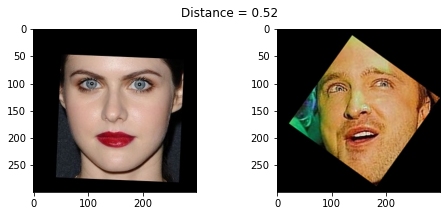

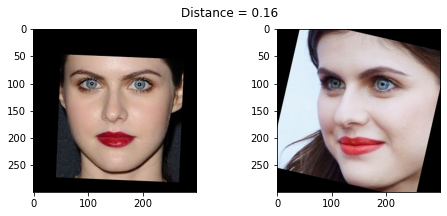

In [23]:
show_pair(170, 8)
show_pair(170, 167)

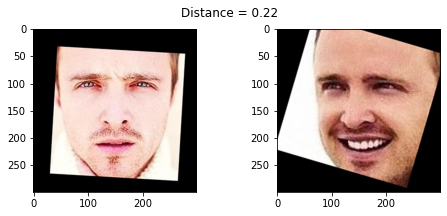

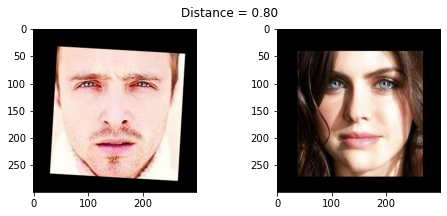

In [24]:
show_pair(1, 5)
show_pair(1, 180)

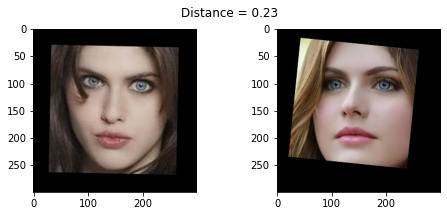

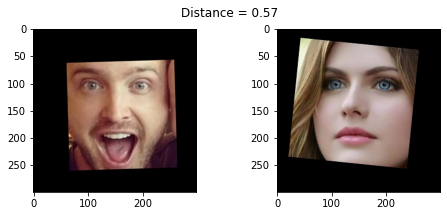

In [25]:
show_pair(200, 197)
show_pair(62, 197)

### Splitting the data into train and test

In [26]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# Features
X_train = np.array(embeddings)[train_idx]
X_test = np.array(embeddings)[test_idx]

# Labels
y_train = np.array([meta.name for meta in metadata[train_idx]])
y_test = np.array([meta.name for meta in metadata[test_idx]])

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9573, 2622)

(1197, 2622)

(9573,)

(1197,)

### Label Encoder

In [27]:
# Encode labels
en = LabelEncoder()
y_train = en.fit_transform(y_train)
y_test = en.fit_transform(y_test)

### Standardizing the vectors

In [28]:
# Standarize features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

### PCA - To reduce the dimension

In [29]:
# Covariance matrix
cov_matrix = np.cov(X_train_sc.T)

# Eigen values and vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Cumulative variance explained
tot = sum(eig_vals)
var_exp = [(i /tot) * 100 for i in sorted(eig_vals, reverse = True)]
cum_var_exp = np.cumsum(var_exp)

print('Cumulative Variance Explained', cum_var_exp)

Cumulative Variance Explained [ 13.58416795  18.94867841  22.94242516 ...  99.99999983  99.99999999
 100.        ]


In [30]:
# Setting the threshold and finding the index whose value is greater than the set threshold
thres = 95
res = list(filter(lambda i: i > thres, cum_var_exp))[0]
index = (cum_var_exp.tolist().index(res))
print(f'Index of element just greater than {thres}: {str(index)}')

Index of element just greater than 95: 346


### Plotting the Variance explained vs Number of Dimensions

<ipython-input-31-b43971c55fa6>:9: MatplotlibDeprecationWarning: Unrecognized location 'BEST'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc = 'BEST')


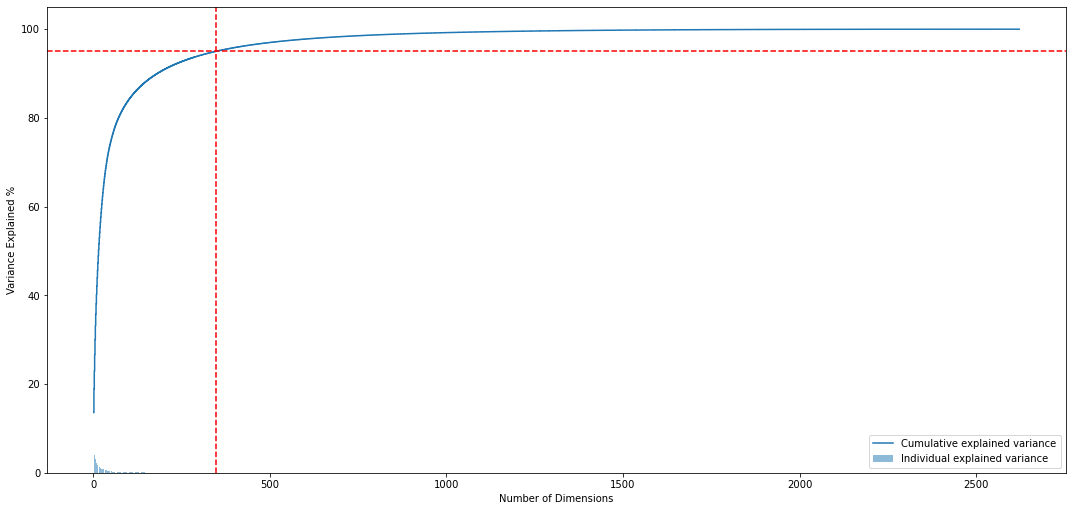

In [31]:
# Ploting 
plt.figure(figsize = (15 , 7.2))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where = 'mid', label = 'Cumulative explained variance')
plt.axhline(y = thres, color = 'r', linestyle = '--')
plt.axvline(x = index, color = 'r', linestyle = '--')
plt.ylabel('Variance Explained %')
plt.xlabel('Number of Dimensions')
plt.legend(loc = 'BEST')
plt.tight_layout()
plt.show()

In [32]:
# Setting a random state
random_state = 32

In [33]:
# Reducing the dimensions
pca = PCA(n_components = index, random_state = random_state, svd_solver = 'full', whiten = True)
pca.fit(X_train_sc)
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
display(X_train_pca.shape, X_test_pca.shape)

(9573, 346)

(1197, 346)

In [34]:
svc_pca = SVC(C = 1, gamma = 0.001, kernel = 'rbf', class_weight = 'balanced', random_state = random_state)
svc_pca.fit(X_train_pca, y_train)
print('The accuracy of SVC for the train set is: {0:.3f}'.format(svc_pca.score(X_train_pca, y_train)*100))

The accuracy of SVC for the train set is: 99.405


In [35]:
# Predict
y_pred = svc_pca.predict(X_test_pca)

# Accuracy Score
print('The accuracy of SVC for the test set is: {}'.format(accuracy_score(y_test, y_pred).round(3)*100))

The accuracy of SVC for the test set is: 96.7


In [36]:
names = [name.split('_')[1].title().strip() for name in labels]

# Classification Report
print('Classification Report: \n{}'.format(classification_report(y_test, y_pred, target_names = np.unique(names))))

Classification Report: 
                          precision    recall  f1-score   support

              Aaron Paul       1.00      1.00      1.00        10
      Alexandra Daddario       0.91      1.00      0.95        10
            Alvaro Morte       1.00      1.00      1.00        14
Alycia Debnam Carey Face       1.00      1.00      1.00        12
             Amanda Crew       1.00      1.00      1.00         7
          Amaury Nolasco       1.00      0.89      0.94         9
        Amber Heard Face       1.00      1.00      1.00         7
               Anna Gunn       1.00      1.00      1.00        14
           Anne Hathaway       1.00      1.00      1.00        14
     Barbara Palvin Face       1.00      1.00      1.00         9
      Bellamy Blake Face       0.87      0.93      0.90        14
    Benedict Cumberbatch       1.00      1.00      1.00        12
            Betsy Brandt       1.00      1.00      1.00        10
              Bill Gates       1.00      0.90      

# ---------------------------------------------------------------------------------------------------------

# PART - FOUR

## Create an automation using computer vision to impute dynamic bounding boxes to locate cars or vehicles on the road

### Importing the necessary libraries

In [ ]:
import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt

In [1]:
# Passing in the path along with the name of the mp4 file used
cap = cv2.VideoCapture("C:/Users/admin/Downloads/Video/video1.mp4")
# Capturing the number of frames in the video
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# Printing the number of frames
print('The frame count is: ',length)

2648


In [ ]:
import pixellib
from pixellib.instance import instance_segmentation
import cv2

# An rcnn model was downloaded and used for sematic segmentation here
segment_video = instance_segmentation()
segment_video.load_model("C:/Users/admin/Downloads/mask_rcnn_coco.h5")
segment_video.process_video("C:/Users/admin/Downloads/Video/video1.mp4", show_bboxes = True, frames_per_second= 15, output_video_name="traffic_monitor.mp4")

### Screenshot of the output video

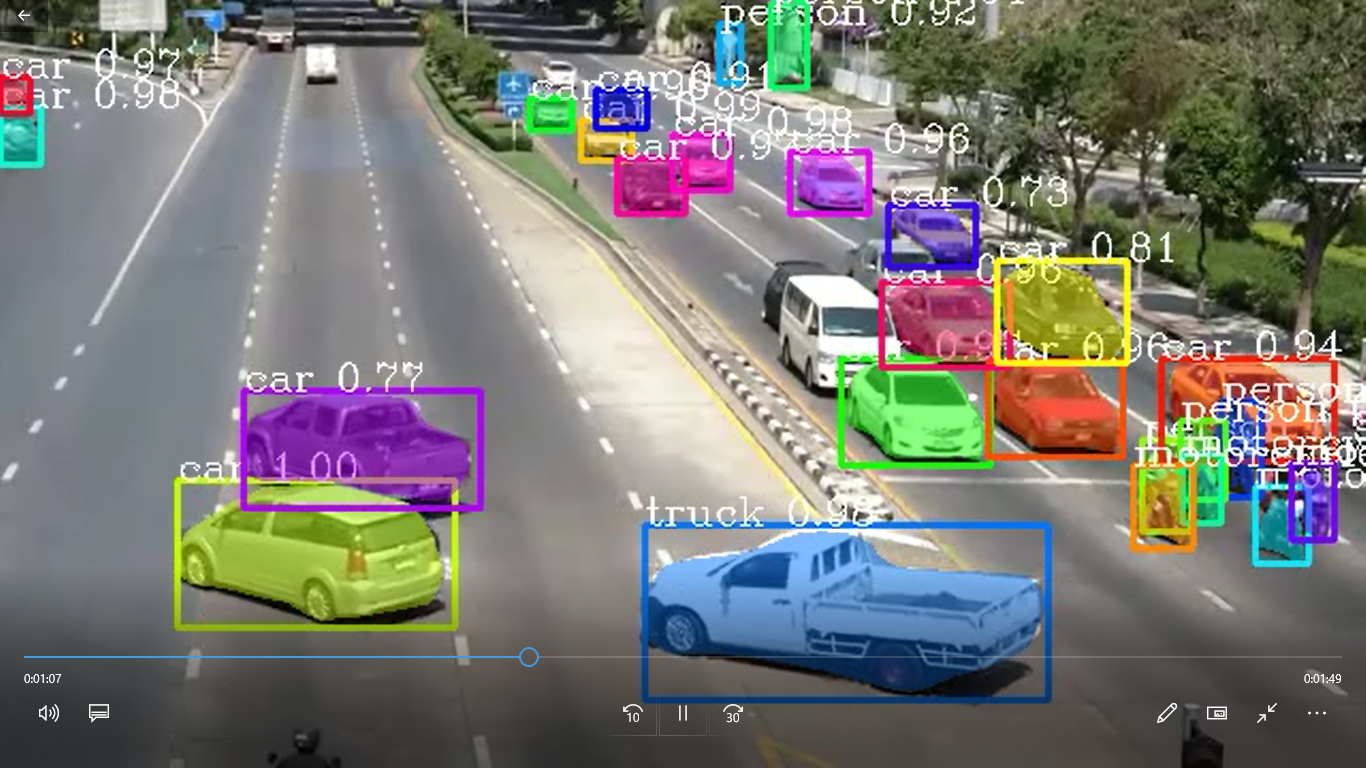

# -------------------------------------------- THE END -----------------------------------------------